## Decision Tree



In [198]:
import pandas as pd
from matplotlib import pyplot as plt

dataset = pd.read_csv("../data/Cancer_Data.csv")

if 'Unnamed: 32' in dataset.columns:
    dataset.drop('Unnamed: 32', axis=1, inplace=True)
dataset['diagnosis'].replace(['B', 'M'],[0, 1], inplace=True) # B = 0, M = 1 
dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [199]:
from sklearn.model_selection import train_test_split

x = dataset.drop(['diagnosis','id'],axis=1)
y = dataset['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [200]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)


DecisionTreeClassifier()

In [201]:
predictions = clf.predict(x_test)

In [202]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9005847953216374

In [203]:
from sklearn.metrics import precision_score
precision_score(y_test, predictions)

0.8714285714285714

Text(0, 0.5, 'Accuracy scores')

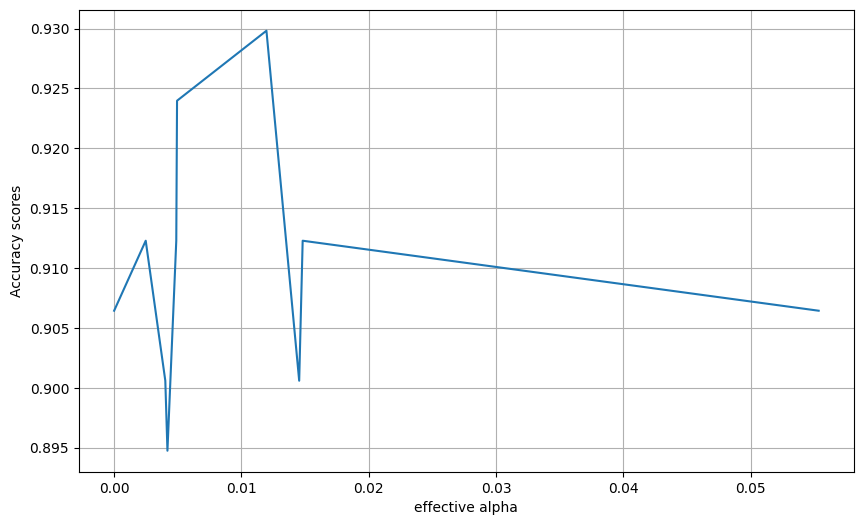

In [204]:
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)

acc_scores = [accuracy_score(y_test, clf.predict(x_test)) for clf in clfs]

plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(ccp_alphas[:-1], acc_scores[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Accuracy scores")

Feature Importance tells us the importance of each feature in determing our results

In [205]:
feature_importance = pd.DataFrame(clf.feature_importances_, index = x_test.columns).sort_values(0, ascending=False)
feature_importance.columns = ['%']
feature_importance

,%
radius_mean,0.0
texture_mean,0.0
symmetry_worst,0.0
concave points_worst,0.0
concavity_worst,0.0
compactness_worst,0.0
smoothness_worst,0.0
area_worst,0.0
perimeter_worst,0.0
texture_worst,0.0


Let's try and seperate the data. First We are going to try to train our model only with the "worst" data.

In [206]:
dataset_worst = dataset.filter(['fractal_dimension_worst','symmetry_worst','concave points_worst','concavity_worst','compactness_worst','smoothness_worst','area_worst','perimeter_worst','texture_worst','radius_worst'],axis=1)
dataset_worst

,fractal_dimension_worst,symmetry_worst,concave points_worst,concavity_worst,compactness_worst,smoothness_worst,area_worst,perimeter_worst,texture_worst,radius_worst
0,0.11890,0.4601,0.2654,0.7119,0.66560,0.16220,2019.0,184.60,17.33,25.380
1,0.08902,0.2750,0.1860,0.2416,0.18660,0.12380,1956.0,158.80,23.41,24.990
2,0.08758,0.3613,0.2430,0.4504,0.42450,0.14440,1709.0,152.50,25.53,23.570
3,0.17300,0.6638,0.2575,0.6869,0.86630,0.20980,567.7,98.87,26.50,14.910
4,0.07678,0.2364,0.1625,0.4000,0.20500,0.13740,1575.0,152.20,16.67,22.540
...,...,...,...,...,...,...,...,...,...,...
564,0.07115,0.2060,0.2216,0.4107,0.21130,0.14100,2027.0,166.10,26.40,25.450
565,0.06637,0.2572,0.1628,0.3215,0.19220,0.11660,1731.0,155.00,38.25,23.690
566,0.07820,0.2218,0.1418,0.3403,0.30940,0.11390,1124.0,126.70,34.12,18.980
567,0.12400,0.4087,0.2650,0.9387,0.86810,0.16500,1821.0,184.60,39.42,25.740


In [207]:
x_worst = dataset_worst
y_worst = dataset['diagnosis']

x_worst_train, x_worst_test, y_worst_train, y_worst_test = train_test_split(x_worst, y_worst, test_size=0.3)

In [208]:
clf_worst = DecisionTreeClassifier()

In [209]:
clf_worst.fit(x_worst_train,y_worst_train)
predictions_worst = clf_worst.predict(x_worst_test)

accuracy_score(y_worst_test, predictions_worst)

0.9239766081871345

In [210]:
precision_score(y_worst_test, predictions_worst)

0.9152542372881356

Text(0, 0.5, 'Accuracy scores')

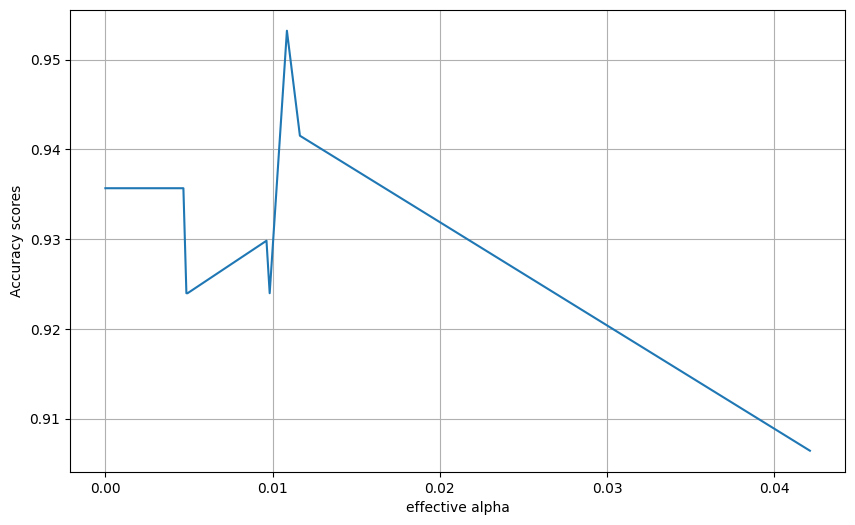

In [211]:
path = clf_worst.cost_complexity_pruning_path(x_worst_train, y_worst_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []

for ccp_alpha in ccp_alphas:
    clf_worst = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_worst.fit(x_worst_train, y_worst_train)
    clfs.append(clf_worst)

acc_scores = [accuracy_score(y_worst_test, clf_worst.predict(x_worst_test)) for clf_worst in clfs]

plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(ccp_alphas[:-1], acc_scores[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Accuracy scores")

In [212]:
max(acc_scores)

0.9532163742690059

In [213]:
ccp_alphas[acc_scores.index(max(acc_scores))]

0.010857860732232593

In [214]:
feature_importance_worst = pd.DataFrame(clf_worst.feature_importances_, index = x_worst_test.columns).sort_values(0, ascending=False)
feature_importance_worst.columns = ['%']
feature_importance_worst

,%
fractal_dimension_worst,0.0
symmetry_worst,0.0
concave points_worst,0.0
concavity_worst,0.0
compactness_worst,0.0
smoothness_worst,0.0
area_worst,0.0
perimeter_worst,0.0
texture_worst,0.0
radius_worst,0.0


Median Values

In [215]:
dataset_mean = dataset.filter(['fractal_dimension_mean','symmetry_mean','concave points_mean','concavity_mean','compactness_mean','smoothness_mean','area_mean','perimeter_mean','texture_mean','radius_mean'],axis=1)
dataset_mean

,fractal_dimension_mean,symmetry_mean,concave points_mean,concavity_mean,compactness_mean,smoothness_mean,area_mean,perimeter_mean,texture_mean,radius_mean
0,0.07871,0.2419,0.14710,0.30010,0.27760,0.11840,1001.0,122.80,10.38,17.99
1,0.05667,0.1812,0.07017,0.08690,0.07864,0.08474,1326.0,132.90,17.77,20.57
2,0.05999,0.2069,0.12790,0.19740,0.15990,0.10960,1203.0,130.00,21.25,19.69
3,0.09744,0.2597,0.10520,0.24140,0.28390,0.14250,386.1,77.58,20.38,11.42
4,0.05883,0.1809,0.10430,0.19800,0.13280,0.10030,1297.0,135.10,14.34,20.29
...,...,...,...,...,...,...,...,...,...,...
564,0.05623,0.1726,0.13890,0.24390,0.11590,0.11100,1479.0,142.00,22.39,21.56
565,0.05533,0.1752,0.09791,0.14400,0.10340,0.09780,1261.0,131.20,28.25,20.13
566,0.05648,0.1590,0.05302,0.09251,0.10230,0.08455,858.1,108.30,28.08,16.60
567,0.07016,0.2397,0.15200,0.35140,0.27700,0.11780,1265.0,140.10,29.33,20.60


In [216]:
x_mean = dataset_mean
y_mean = dataset['diagnosis']

x_mean_train, x_mean_test, y_mean_train, y_mean_test = train_test_split(x_mean, y_mean, test_size=0.3)

clf_mean = DecisionTreeClassifier()
clf_mean.fit(x_mean_train,y_mean_train)
predictions_mean = clf_mean.predict(x_mean_test)

accuracy_score(y_mean_test, predictions_mean)

0.8888888888888888

In [217]:
precision_score(y_mean_test, predictions_mean)

0.8461538461538461

In [218]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_mean_test, predictions_mean, labels=[0,1])

array([[97, 10],
       [ 9, 55]])

In [219]:
feature_importance_mean = pd.DataFrame(clf_mean.feature_importances_, index = x_mean_test.columns).sort_values(0, ascending=False)
feature_importance_mean.columns = ['%']
feature_importance_mean

,%
concave points_mean,0.692336
texture_mean,0.133099
smoothness_mean,0.031944
area_mean,0.030955
compactness_mean,0.028635
perimeter_mean,0.025854
concavity_mean,0.025799
radius_mean,0.020677
fractal_dimension_mean,0.010701
symmetry_mean,0.000000


SE VALUES

In [220]:
dataset_se = dataset.filter(['fractal_dimension_se','symmetry_se','concave points_se','concavity_se','compactness_se','smoothness_se','area_se','perimeter_se','texture_se','radius_se'],axis=1)
dataset_se

,fractal_dimension_se,symmetry_se,concave points_se,concavity_se,compactness_se,smoothness_se,area_se,perimeter_se,texture_se,radius_se
0,0.006193,0.03003,0.01587,0.05373,0.04904,0.006399,153.40,8.589,0.9053,1.0950
1,0.003532,0.01389,0.01340,0.01860,0.01308,0.005225,74.08,3.398,0.7339,0.5435
2,0.004571,0.02250,0.02058,0.03832,0.04006,0.006150,94.03,4.585,0.7869,0.7456
3,0.009208,0.05963,0.01867,0.05661,0.07458,0.009110,27.23,3.445,1.1560,0.4956
4,0.005115,0.01756,0.01885,0.05688,0.02461,0.011490,94.44,5.438,0.7813,0.7572
...,...,...,...,...,...,...,...,...,...,...
564,0.004239,0.01114,0.02454,0.05198,0.02891,0.010300,158.70,7.673,1.2560,1.1760
565,0.002498,0.01898,0.01678,0.03950,0.02423,0.005769,99.04,5.203,2.4630,0.7655
566,0.003892,0.01318,0.01557,0.04730,0.03731,0.005903,48.55,3.425,1.0750,0.4564
567,0.006185,0.02324,0.01664,0.07117,0.06158,0.006522,86.22,5.772,1.5950,0.7260


In [221]:
x_se = dataset_se
y_se = dataset['diagnosis']

x_se_train, x_se_test, y_se_train, y_se_test = train_test_split(x_se, y_se, test_size=0.3)

clf_se = DecisionTreeClassifier()
clf_se.fit(x_se_train,y_se_train)
predictions_se = clf_se.predict(x_se_test)

accuracy_score(y_se_test, predictions_se)

0.7894736842105263

In [222]:
precision_score(y_se_test, predictions_se)

0.6119402985074627

In [223]:
feature_importance_se = pd.DataFrame(clf_se.feature_importances_, index = x_se_test.columns).sort_values(0, ascending=False)
feature_importance_se.columns = ['%']
feature_importance_se

,%
area_se,0.611569
concavity_se,0.110919
texture_se,0.069616
symmetry_se,0.058077
radius_se,0.049720
smoothness_se,0.031062
concave points_se,0.023947
perimeter_se,0.018491
fractal_dimension_se,0.013907
compactness_se,0.012691


Since SE features predicted the worst values let's test without them

In [224]:
dataset_worstMean = dataset.drop(['id','diagnosis','fractal_dimension_se','symmetry_se','concave points_se','concavity_se','compactness_se','smoothness_se','area_se','perimeter_se','texture_se','radius_se'],axis=1)
dataset_worstMean

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [225]:
x_worstMean = dataset_worstMean
y_worstMean = dataset['diagnosis']

x_worstMean_train, x_worstMean_test, y_worstMean_train, y_worstMean_test = train_test_split(x_worstMean, y_worstMean, test_size=0.3)

clf_worstMean = DecisionTreeClassifier()
clf_worstMean.fit(x_worstMean_train,y_worstMean_train)
predictions_worstMean = clf_worstMean.predict(x_worstMean_test)

accuracy_score(y_worstMean_test, predictions_worstMean)

0.9122807017543859

In [226]:
precision_score(y_worstMean_test, predictions_worstMean)

0.8529411764705882

In [227]:
feature_importance_worstMean = pd.DataFrame(clf_worstMean.feature_importances_, index = x_worstMean_test.columns).sort_values(0, ascending=False)
feature_importance_worstMean.columns = ['%']
feature_importance_worstMean

,%
concave points_worst,0.729893
area_worst,0.105643
texture_worst,0.036484
radius_mean,0.029589
concavity_mean,0.020485
fractal_dimension_worst,0.018658
symmetry_mean,0.018594
smoothness_worst,0.015767
area_mean,0.014303
symmetry_worst,0.010584


In [228]:
dataset_custom = dataset.filter(['radius_mean','perimeter_mean','area_mean','concavity_mean','concave points_mean','radius_worst','perimeter_worst','area_worst','concave points_worst'],axis=1)
dataset_custom

,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concave points_worst
0,17.99,122.80,1001.0,0.30010,0.14710,25.380,184.60,2019.0,0.2654
1,20.57,132.90,1326.0,0.08690,0.07017,24.990,158.80,1956.0,0.1860
2,19.69,130.00,1203.0,0.19740,0.12790,23.570,152.50,1709.0,0.2430
3,11.42,77.58,386.1,0.24140,0.10520,14.910,98.87,567.7,0.2575
4,20.29,135.10,1297.0,0.19800,0.10430,22.540,152.20,1575.0,0.1625
...,...,...,...,...,...,...,...,...,...
564,21.56,142.00,1479.0,0.24390,0.13890,25.450,166.10,2027.0,0.2216
565,20.13,131.20,1261.0,0.14400,0.09791,23.690,155.00,1731.0,0.1628
566,16.60,108.30,858.1,0.09251,0.05302,18.980,126.70,1124.0,0.1418
567,20.60,140.10,1265.0,0.35140,0.15200,25.740,184.60,1821.0,0.2650


In [229]:
x_custom = dataset_custom
y_custom = dataset['diagnosis']

x_custom_train, x_custom_test, y_custom_train, y_custom_test = train_test_split(x_custom, y_custom, test_size=0.3)

clf_custom = DecisionTreeClassifier()
clf_custom.fit(x_custom_train,y_custom_train)
predictions_custom = clf_custom.predict(x_custom_test)

accuracy_score(y_custom_test, predictions_custom)

0.9298245614035088

In [230]:
precision_score(y_custom_test, predictions_custom)

0.9310344827586207

In [231]:
feature_importance_custom = pd.DataFrame(clf_custom.feature_importances_, index = x_custom_test.columns).sort_values(0, ascending=False)
feature_importance_custom.columns = ['%']
feature_importance_custom

,%
concave points_worst,0.789572
area_worst,0.147256
area_mean,0.022191
perimeter_worst,0.020263
concave points_mean,0.010613
radius_worst,0.010105
radius_mean,0.000000
perimeter_mean,0.000000
concavity_mean,0.000000


#### 